#  Multiple Linear Regression For BoomBike Share 

    Building a multiple linear regression model to predict the demand for shared bikes for a US bike-sharing provider, BoomBikes. The data used in this project consists of daily bike demands based on various factors like weather, season, and other variables.

Data Overview

    The dataset has a mix of categorical and numerical variables. Some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4, which are not ordered, but rather represent categorical values. Therefore, it is essential to convert these feature values into categorical string values before proceeding with model building.

    The 'yr' column has two values, 0 and 1, representing the years 2018 and 2019, respectively. Although it might seem like dropping this column is a good idea, it is essential to consider that these bike-sharing systems are gaining popularity, and the demand for these bikes is increasing every year. Therefore, the 'yr' column might be a useful variable for prediction.

    The target variable for this project is the 'cnt' variable, which indicates the total number of bike rentals, including both casual and registered users.

# Project Steps
1-Reading and understanding the data

2-Visualizing the data

3-Preparing the data

4-Spliting the data into training and testing sets

5-Building a linear models

6-Performing residual analysis on the training data and validate the models

7-Make predictions using the final model

8-Evaluate the fina model performance

## 1: Reading and Understanding the Data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data
df = pd.read_csv('day.csv')

In [3]:
# Checking Data Head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking data shape 
df.shape

(730, 16)

In [5]:
# Data Statistical Facts 

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Data Info including missing values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# There is no Missing Values
# Missing Value Confirmation

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Data Understanding 
The BoomBike data is a dataset containing information on the demand for shared bikes for a US bike-sharing provider called BoomBikes. The data is based on various factors like weather, season, and other variables that may affect bike rental demand. The dataset has a mix of categorical and numerical variables, including 'weathersit', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', and 'cnt'.

The target variable for this project is 'cnt', which represents the total number of bike rentals, including both casual and registered users. Other variables, such as temperature, wind speed, season, and weather, may also significantly impact bike rental demand. Therefore, understanding the data and identifying the variables that affect bike rental demand is essential to build a reliable model that can predict bike rental demand accurately.

Overall, analyzing the BoomBike data can provide valuable insights into the factors that influence bike rental demand and help BoomBike Share make informed decisions to improve its inventory and marketing strategies.

In [8]:
# Copy Data Frame 

df_1 = df.copy()

In [9]:
# checking new copy shape

df_1.shape

(730, 16)

In [10]:
# Checking for Dupicated Values 

df_1.duplicated().sum()

0

In [11]:
# dropping the unwanted columns

df_1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
# Encoding season 

df_1.season = df_1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [13]:
# Encoding month 

df_1.mnth = df_1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})



In [14]:
# Encoding column

df_1.weekday = df_1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
# Encoding weathersit column

df_1.weathersit = df_1.weathersit.map({1:' Sunny',2:'Foggy',3:'Rain/Snowing',4:'Heavy Rain/Snow'})


In [16]:
# Maping Working Days 
df_1.holyday = df_1.holiday.map({0:"Regular Day", 1:"Holiday"})

In [17]:
# check the head of the dataset

df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Foggy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Foggy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# checking info

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

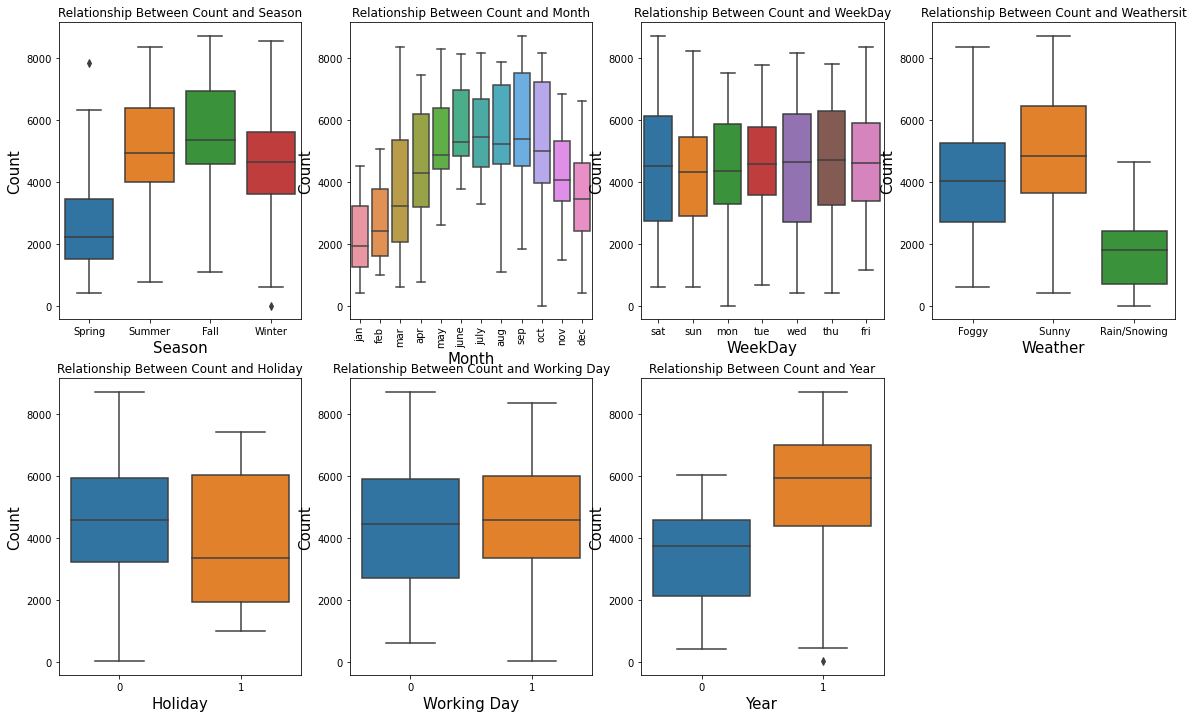

In [19]:
# visualizing the categorical Variables
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_1)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and Season", fontsize=12)

plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_1)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=15)

plt.title ("Relationship Between Count and Month", fontsize=12)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_1)
plt.xlabel("WeekDay", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and WeekDay", fontsize=12)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_1)
plt.xlabel("Weather", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and Weathersit", fontsize=12)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_1)
plt.xlabel("Holiday", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and Holiday", fontsize=12)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_1)
plt.xlabel("Working Day", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and Working Day", fontsize=12)

plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_1)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title ("Relationship Between Count and Year", fontsize=12)
plt.show()

# Analyzing Categorical variables




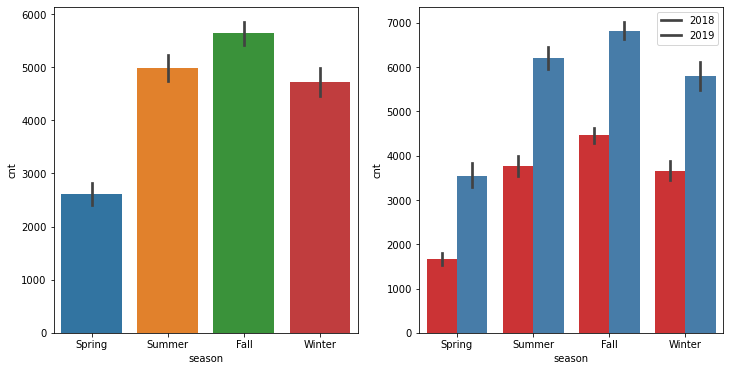

In [20]:
# creating barplot related to categorical variables

def plot_column(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df_1)
    
  
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df_1, hue='yr',palette='Set1')

    plt.legend(labels=['2018', '2019'])
  
    plt.show()
plot_column('season')

In [21]:
#Fall Season and year 2019 has the Largest Count of Bike Rentals 

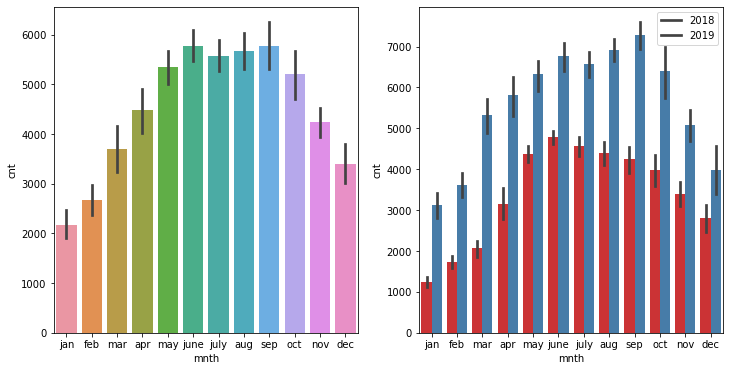

In [22]:
# plotting Monthly Data

plot_column('mnth')

In [23]:
# Higher Booking Activity from May to Sep

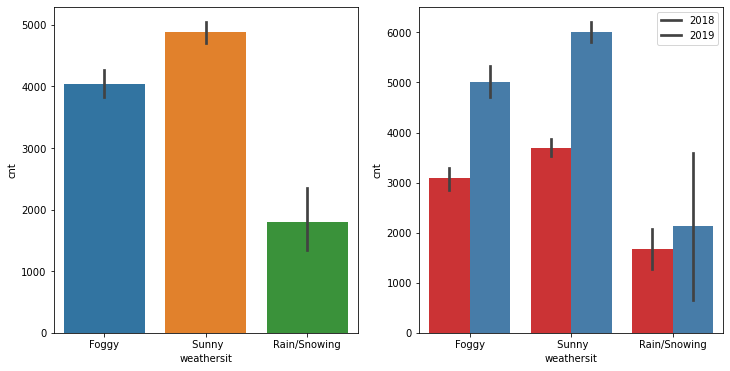

In [24]:
# plotting weathersit 

plot_column('weathersit')

In [25]:
# Higher Activities During Sunny Days 

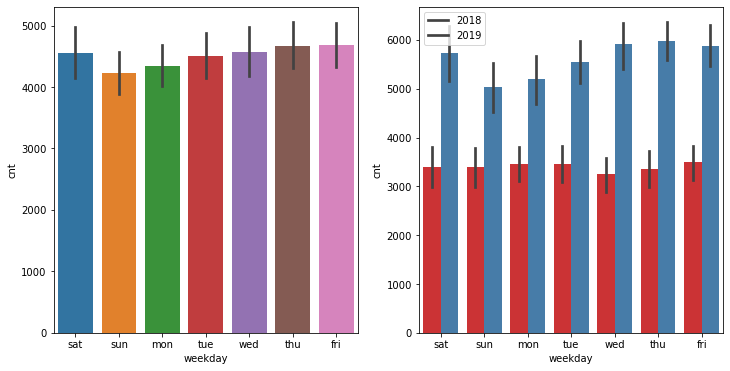

In [26]:
# plotting WeekDay

plot_column('weekday')

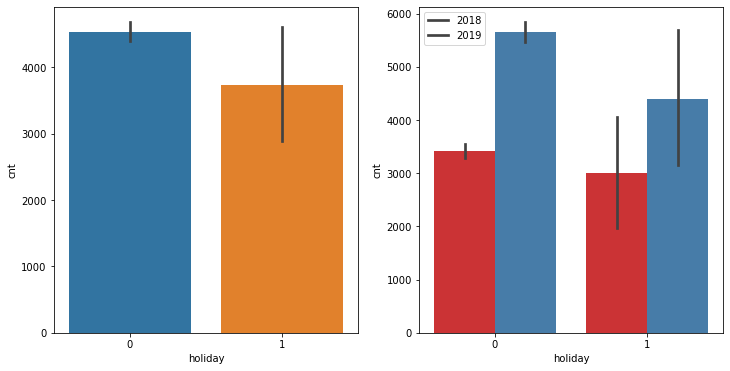

In [27]:
# plotting holiday 

plot_column('holiday')

In [28]:
# Low Activity On holidays

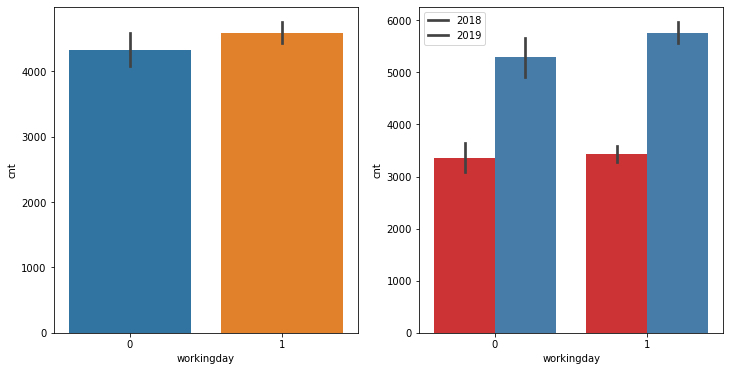

In [29]:
# plotting  workingday 

plot_column('workingday')

In [30]:
# there is no big Diffrience between working day and None Working, Higher Activity through 2019

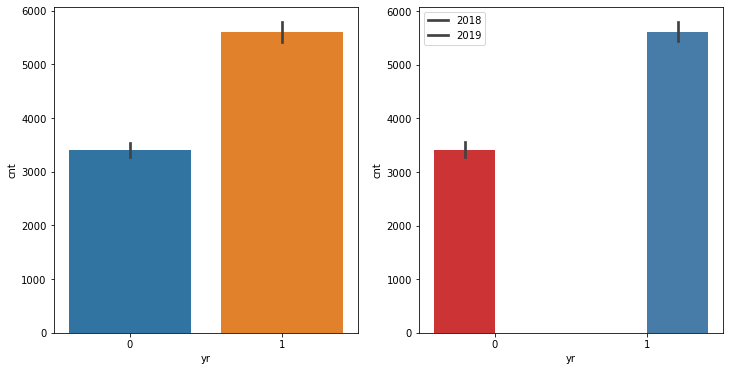

In [31]:
# plotting YEAR

plot_column('yr')

In [32]:
# 2019 has Higher Activity 

# Analyzing Numerical variables

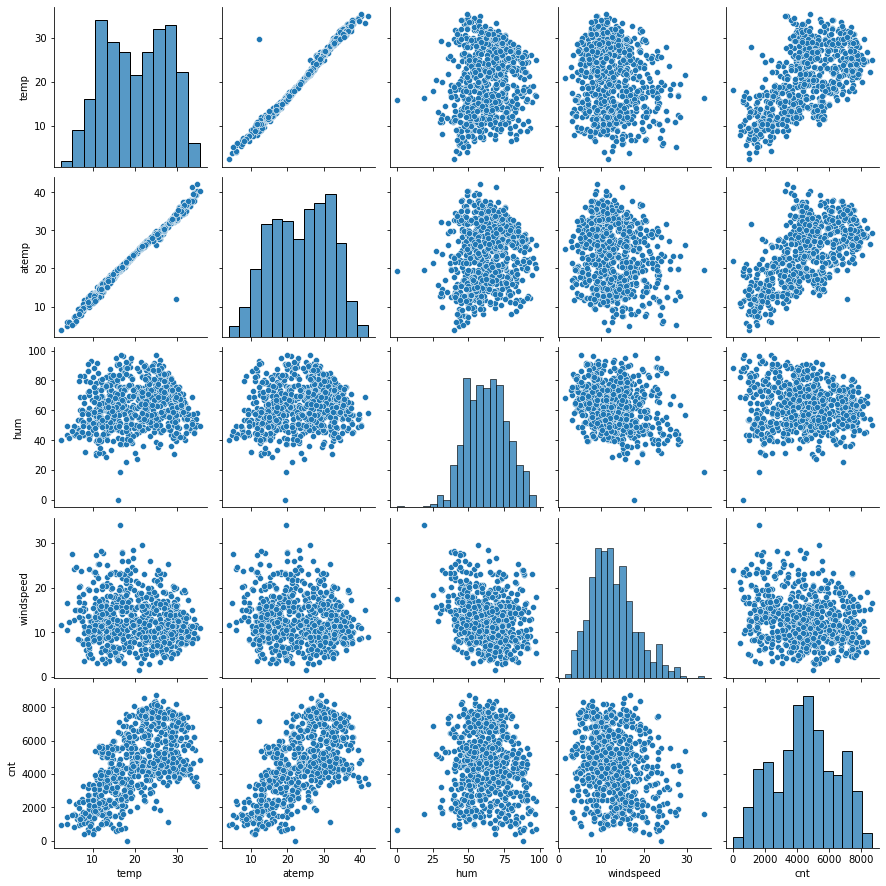

In [33]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df_1,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

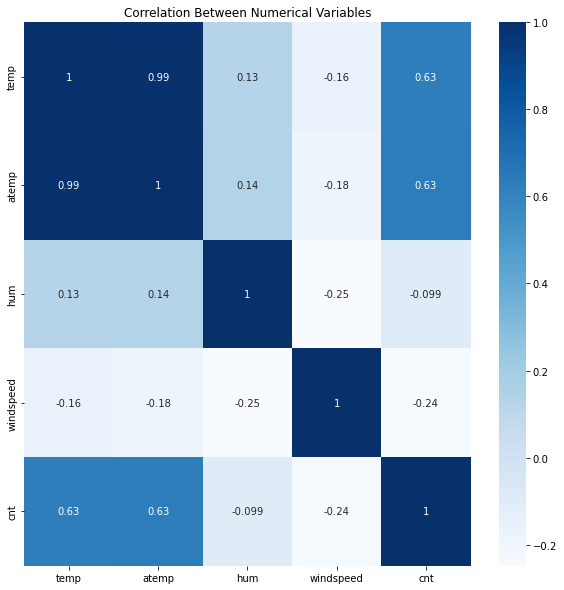

In [34]:
# correlation between the numerical variables

plt.figure(figsize = (10,10))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="Blues")
plt.title("Correlation Between Numerical Variables")
plt.show()

In [35]:
# Obviously There is linear relationship between temp and atemp. 
# Desicion will be made according to VIF and P-value

##  3: Data Preparation

In [36]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(df_1.mnth,drop_first=True)
weekdays=pd.get_dummies(df_1.weekday,drop_first=True)
weathersit=pd.get_dummies(df_1.weathersit,drop_first=True)
seasons=pd.get_dummies(df_1.season,drop_first=True)

In [37]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,sat,0,Foggy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,sun,0,Foggy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,mon,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,tue,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,wed,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Merging  the dataframe, with the dummy variable dataset. 

df_2 = pd.concat([df_1,months,weekdays,weathersit,seasons],axis=1)

In [39]:
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
0,Spring,0,jan,0,sat,0,Foggy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,Spring,0,jan,0,sun,0,Foggy,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,Spring,0,jan,0,mon,1,Sunny,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,jan,0,tue,1,Sunny,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,jan,0,wed,1,Sunny,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    object 
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    object 
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    object 
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    object 
 7   temp          730 non-null    float64
 8   atemp         730 non-null    float64
 9   hum           730 non-null    float64
 10  windspeed     730 non-null    float64
 11  cnt           730 non-null    int64  
 12  aug           730 non-null    uint8  
 13  dec           730 non-null    uint8  
 14  feb           730 non-null    uint8  
 15  jan           730 non-null    uint8  
 16  july          730 non-null    uint8  
 17  june          730 non-null    uint8  
 18  mar           730 non-null    

In [41]:
# dropping unnecessary columns.

df_2.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [42]:
# check data head

df_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [43]:
# check the shape of new dataframe

df_2.shape

(730, 30)

In [44]:
# check the column info of new dataframe 

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   aug           730 non-null    uint8  
 9   dec           730 non-null    uint8  
 10  feb           730 non-null    uint8  
 11  jan           730 non-null    uint8  
 12  july          730 non-null    uint8  
 13  june          730 non-null    uint8  
 14  mar           730 non-null    uint8  
 15  may           730 non-null    uint8  
 16  nov           730 non-null    uint8  
 17  oct           730 non-null    uint8  
 18  sep           730 non-null    

##  4: Spliting the data into training and testing sets

In [45]:
# splitting the dataframe 
# renaming few columns for better readibility

df_2.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count', 'atemp':'feeling_temp'}, inplace=True)
np.random.seed(0)
df_train, df_test = train_test_split(df_2, train_size = 0.7, random_state = 100)

In [46]:
# checking the shape of train data

df_train.shape

(510, 30)

In [47]:
# checking the shape of testing datatset

df_test.shape

(220, 30)

In [48]:
# Scaling with MinMaxScaler 

scaler = MinMaxScaler()

In [49]:
# verifying 

df_train.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,1,0,0,1,0


In [50]:
# Appling scaler() Numercial Variables 

num_var = ['temp','feeling_temp','humidity','windspeed','count']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [51]:
# verifying the head 

df_train.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [52]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


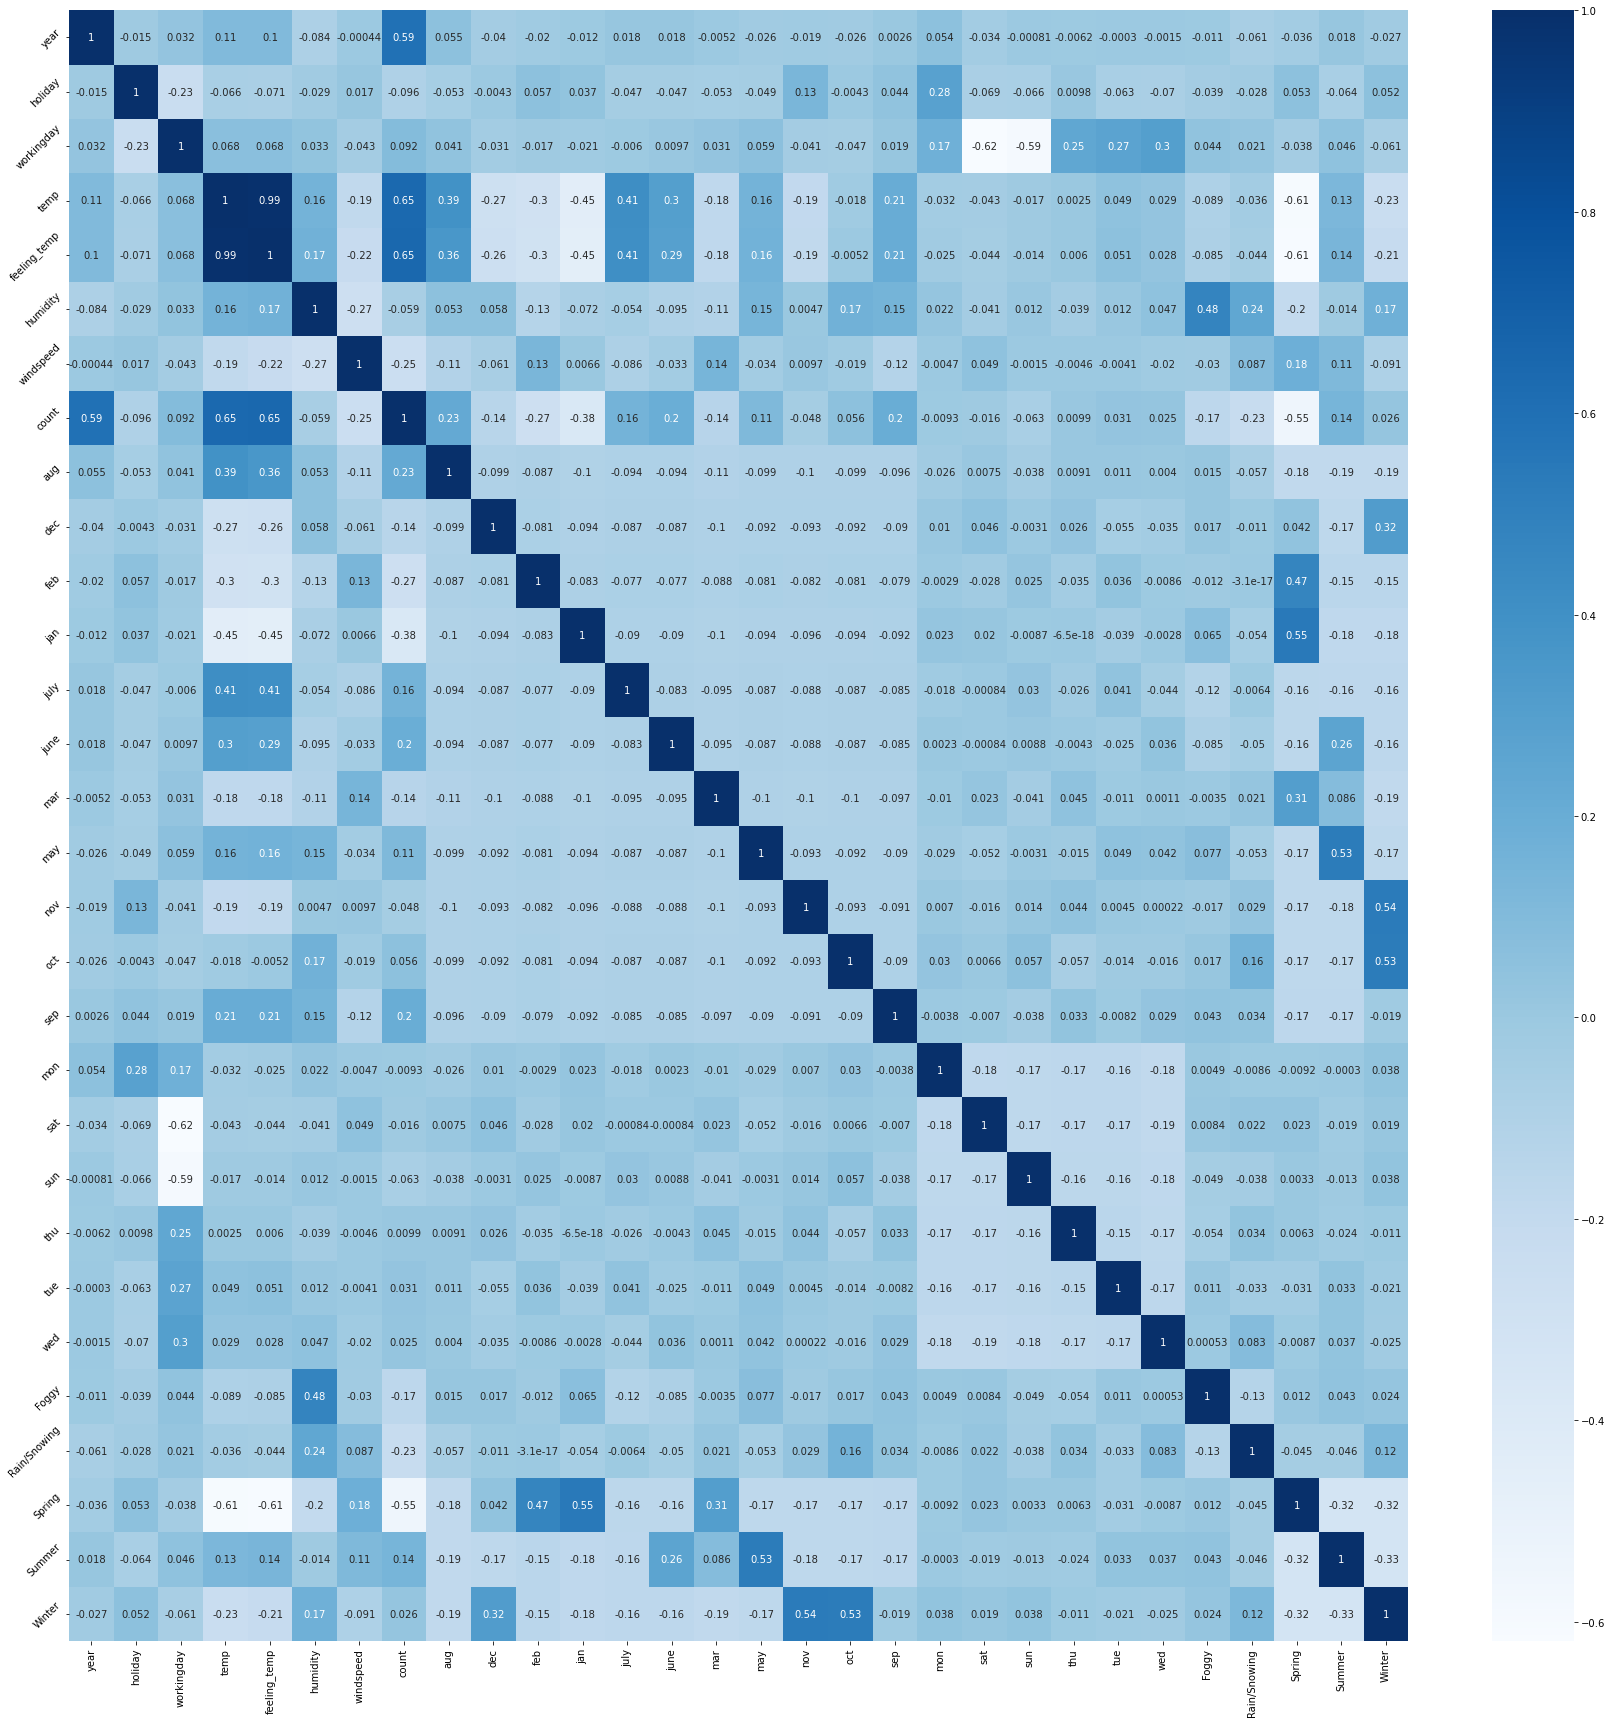

In [53]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()

In [54]:
# Count seems to have correlation with year variable and temp. 
#Similarly, Foggy and humidity show correlation. 
#Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good #correlation.

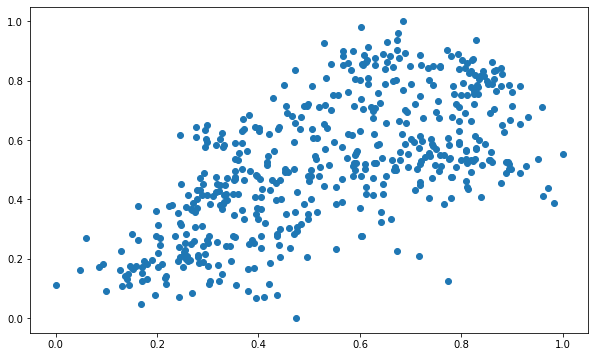

In [55]:
# Scatter plot of the correlation 
# Scatter plot of the correlation 
plt.figure(figsize=[10,6])
plt.scatter(df_train.temp, df_train['count'])
plt.show()


In [56]:
df_train.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


# 5: Linear Models

In [57]:
df_train.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [58]:
#  Linear Model

y_train = df_train.pop('count')
X_train = df_train

In [59]:
X_train.shape

(510, 29)

In [60]:
y_train.shape

(510,)

In [61]:
X_train.shape

(510, 29)

In [62]:
y_train.shape

(510,)

In [63]:

# Define the recursive feature elimination (RFE) object
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15, step=1)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Print the selected features
print("Selected Features: ", X_train.columns[rfe.support_])


Selected Features:  Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Foggy', 'Rain/Snowing', 'Spring',
       'Summer', 'Winter'],
      dtype='object')


In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('feeling_temp', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Foggy', True, 1),
 ('Rain/Snowing', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [65]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Foggy', 'Rain/Snowing', 'Spring',
       'Summer', 'Winter'],
      dtype='object')


In [66]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['feeling_temp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [67]:
# Calculating VIF of variables

def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [68]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [69]:
# calculate VIF

calVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
8,sat,12.20
9,sun,11.79
12,Spring,5.02
3,temp,3.62
14,Winter,3.49
1,holiday,2.91
13,Summer,2.62
4,humidity,1.91
10,Foggy,1.57


# First Linear Regression Model

In [70]:
# We will Focus On Higher VIF 
X_train_l = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_l).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.11e-191
Time:                        18:22:50   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1995      0.028      7.200   

In [71]:
# workingday shows high P-value
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)


# Running the function 
calVIF(X_train_new)

,Features,VIF
3,humidity,28.25
2,temp,16.06
4,windspeed,4.68
11,Spring,4.03
13,Winter,3.36
12,Summer,2.79
9,Foggy,2.30
0,year,2.08
5,july,1.59
6,sep,1.39


# Secound Linear Regression Model

In [72]:
X_train_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.11e-191
Time:                        18:22:50   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2832      0.034      8.300   

In [73]:
# We can drop sub humidity since it has high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,Summer,2.24
10,Spring,2.13
0,year,2.07
12,Winter,1.84
4,july,1.59
8,Foggy,1.56
5,sep,1.34
6,sat,1.23


# Third Linear Regression Model

In [74]:
# in this MOdel we will focus on high P-Value
X_train_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.28e-188
Time:                        18:22:50   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2037      0.029      6.972   

In [75]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Running the function 
calVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,Summer,2.24
9,Spring,2.11
0,year,2.07
11,Winter,1.81
4,july,1.59
7,Foggy,1.56
5,sep,1.34
6,sun,1.18


# Fourth Linear Regression Model

In [76]:
X_train_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.45e-189
Time:                        18:22:51   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2060      0.029      7.074   

In [77]:
# Dropping july since it has higher P-value ( not really high but i'm looking for better prediction) 
X_train_new = X_train_new.drop(['july'], axis = 1)

# Running the function 
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,Spring,2.02
9,Summer,1.91
10,Winter,1.66
6,Foggy,1.55
4,sep,1.23
5,sun,1.18
7,Rain/Snowing,1.08


# Fifth Linear Regression Model

In [78]:
X_train_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.23e-189
Time:                        18:22:51   Log-Likelihood:                 503.99
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     498   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1981      0.029      6.794   

In [79]:

# we are looking good 
# Running the function 
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,Spring,2.02
9,Summer,1.91
10,Winter,1.66
6,Foggy,1.55
4,sep,1.23
5,sun,1.18
7,Rain/Snowing,1.08


# The Fifth model lr_5, which has been developed based on the features selected using both Recursive Feature Elimination (RFE) and Variance Inflation Factor (VIF) methods, appears to have low multicollinearity between the predictor variables, and all the predictors have significant p-values. The F-Statistics value of 255 (which is greater than 1) and the p-value of   Prob (F-statistic):      6.34e-189 (almost equal to zero) indicate that the overall model is significant. Therefore, we can consider lr_5 as a suitable model for predicting the bike rental counts.

In [80]:
# Now We know that we have a strong linear relationship
# Checking the coefficient values
lr_5.params

const           0.198086
year            0.234000
holiday        -0.104300
temp            0.478161
windspeed      -0.148022
sep             0.089359
sun            -0.049479
Foggy          -0.080899
Rain/Snowing   -0.290403
Spring         -0.054372
Summer          0.062284
Winter          0.096907
dtype: float64

# 6: Residual Analysis 

In [81]:
X_train_5

,const,year,holiday,temp,windspeed,sep,sun,Foggy,Rain/Snowing,Spring,Summer,Winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,0,1,0


In [82]:
y_train_pred = lr_5.predict(X_train_5)

Text(0.5, 0, 'Errors')

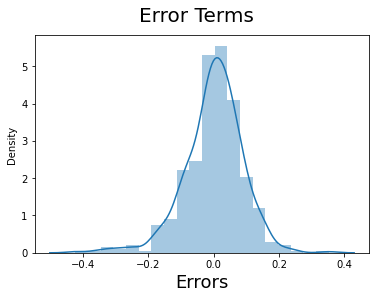

In [83]:
#Error Histogram

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [84]:
#MultiColinearity
calVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.91
0,year,2.07
8,Spring,2.02
9,Summer,1.91
10,Winter,1.66
6,Foggy,1.55
4,sep,1.23
5,sun,1.18
7,Rain/Snowing,1.08


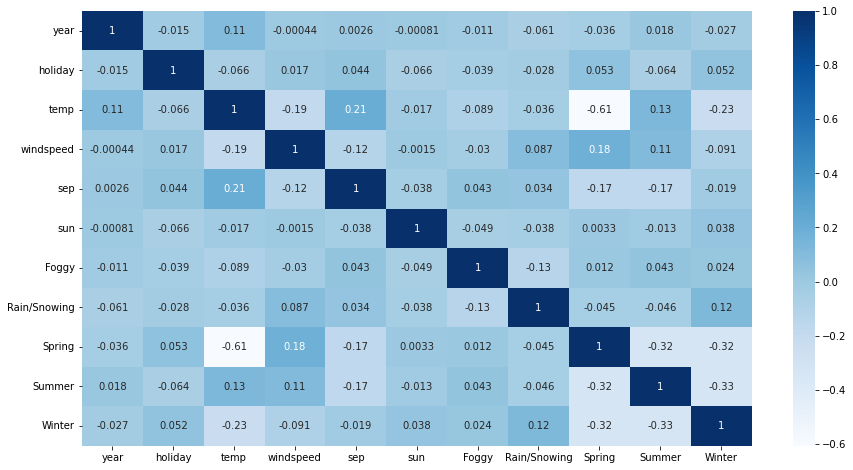

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="Blues")
plt.show()

In [86]:
lr_5.params

const           0.198086
year            0.234000
holiday        -0.104300
temp            0.478161
windspeed      -0.148022
sep             0.089359
sun            -0.049479
Foggy          -0.080899
Rain/Snowing   -0.290403
Spring         -0.054372
Summer          0.062284
Winter          0.096907
dtype: float64

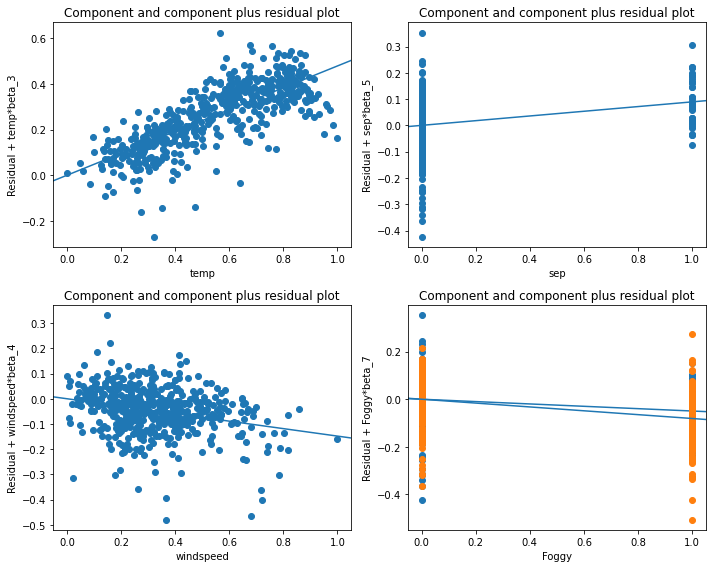

In [87]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sm.graphics.plot_ccpr(lr_5, 'temp', ax=axs[0, 0])
sm.graphics.plot_ccpr(lr_5, 'sep', ax=axs[0, 1])
sm.graphics.plot_ccpr(lr_5, 'windspeed', ax=axs[1, 0])
sm.graphics.plot_ccpr(lr_5, 'sun', ax=axs[1, 1])
sm.graphics.plot_ccpr(lr_5, 'Foggy', ax=axs[1, 1])
plt.tight_layout()
plt.show()


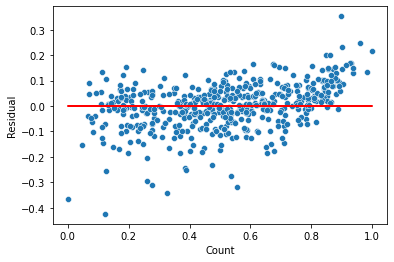

In [88]:
# Homoscedasticity
y_train_pred = lr_5.predict(X_train_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# 7: Making Predictions 

In [89]:
# Applying scaling on the test dataset

num_var = ['temp', 'feeling_temp', 'humidity', 'windspeed','count']
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [90]:
df_test.describe()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,count,aug,dec,...,sat,sun,thu,tue,wed,Foggy,Rain/Snowing,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
y_test = df_test.pop('count')
X_test = df_test

In [92]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_5 = sm.add_constant(X_test)

In [93]:
y_pred = lr_5.predict(X_test_5)

In [94]:

print(lr_5.params.shape)

(12,)


In [95]:
lr_5.params

const           0.198086
year            0.234000
holiday        -0.104300
temp            0.478161
windspeed      -0.148022
sep             0.089359
sun            -0.049479
Foggy          -0.080899
Rain/Snowing   -0.290403
Spring         -0.054372
Summer          0.062284
Winter          0.096907
dtype: float64

In [96]:
X_test_5.columns

Index(['const', 'year', 'holiday', 'temp', 'windspeed', 'sep', 'sun', 'Foggy',
       'Rain/Snowing', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [97]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8066

In [98]:
# r ^ 2 = 79% 

# 8: Evaluating The Model

Text(0, 0.5, 'y_pred')

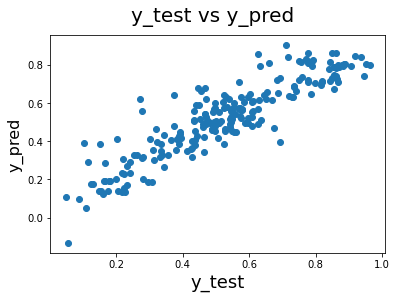

In [99]:
# Understanding the Spread 

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [100]:
round(lr_5.params,4)

const           0.1981
year            0.2340
holiday        -0.1043
temp            0.4782
windspeed      -0.1480
sep             0.0894
sun            -0.0495
Foggy          -0.0809
Rain/Snowing   -0.2904
Spring         -0.0544
Summer          0.0623
Winter          0.0969
dtype: float64

In [101]:
# Calculating Adjusted-R^2 

adjusted_r = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r)

0.7963


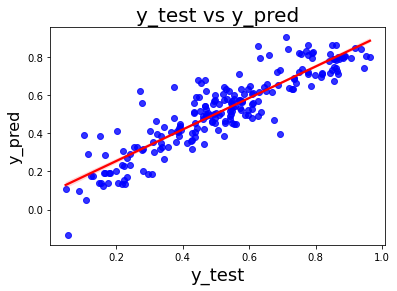

In [102]:
# Visualizing the fit with regression line 

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Model Performance Metrics	

Train dataset R^2	0.836      Train dataset Adjusted R^2	0.833

Test dataset R^2	0.7965     Test dataset Adjusted R^2	0.7868

Based on the LR_5 model performance metrics, it can be concluded that the demand for bikes is significantly affected by the following predictor variables: year, holiday, temperature, wind speed, September, Foggy, Rain/Snowing, Summer, and Winter. The model shows a good fit with an R-squared value of 0.836 for the training dataset and 0.7965 for the testing dataset. Both datasets also have an acceptable adjusted R-squared value, with a slightly higher value for the training dataset.

Moreover, the coefficients of the predictor variables in the LR_5 model suggest that temperature has the highest positive effect on bike demand, followed by year, Winter, and September. In contrast, Rain/Snowing has the most significant negative effect on bike demand, followed by windspeed, holiday, and Foggy. The coefficients of the remaining predictor variables, such as sun, are relatively small and may not have a significant impact on bike demand.

The following table shows the coefficients of the predictor variables used in the LR_5 model:

Predictor Variables	Coefficient
Year     	  0.2328
Holiday 	 -0.1067
Temperature	  0.5471
Windspeed	 -0.1531
September	  0.0994
Sun	         -0.0498
Foggy	     -0.0806
Rain/Snowing -0.2883
Summer	      0.0878
Winter	      0.1311

# Recommendations
Based on our analysis, we recommend that BoomBike focuses its marketing efforts on non-holiday days with moderate weather conditions. Working days from June through September, specifically during the summer and fall, tend to have the highest demand for bike rentals. It is also important to note that weather conditions have a significant impact on rental demand, with good moderate weather being the most favorable. As such, BoomBike should consider adjusting its pricing strategy to reflect these trends and improve its overall marketing efforts to attract more customers during these peak periods.